In [23]:
import pandas as pd
import os
import matplotlib.pyplot as plt

## 1- merge all 12 months files in one csv file

In [24]:
all_months = pd.DataFrame()
files = [file for file in os.listdir('./Sales_Data')]
for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_months = pd.concat([all_months, df])
all_months.to_csv('all_data.csv',index = False)

## 2- read new all data file and clean data

In [25]:
df = pd.read_csv('all_data.csv')
df.dropna(how = 'all',inplace = True)

#### find 'or' and delete it

In [26]:
df = df[df['Order Date'].str[0:2] != 'Or']

### make new columns to make it easier

#### months column:

In [27]:
df['Month'] = df['Order Date'].str[0:2]
df['Month'] = df['Month'].astype('int32')

#### total price column:

In [28]:
df['Price Each'] = pd.to_numeric(df['Price Each'])
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Total Price'] = df['Price Each'] * df['Quantity Ordered']

#### city column:

In [29]:
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1] + x.split(',')[2][0:3])

#### hours column:

In [30]:
df['Order Date.date'] = pd.to_datetime(df['Order Date'])
df['Hours'] = df['Order Date.date'].dt.hour

In [31]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City,Order Date.date,Hours
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,2019-04-19 08:46:00,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,2019-04-07 22:30:00,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,2019-04-12 14:38:00,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,2019-04-12 14:38:00,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,2019-04-30 09:27:00,9
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles CA,2019-09-17 20:56:00,20
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco CA,2019-09-01 16:00:00,16
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco CA,2019-09-23 07:39:00,7
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco CA,2019-09-19 17:30:00,17


## 3- Questions:

#### q1: what is the best month for sales? how much was earned that month?

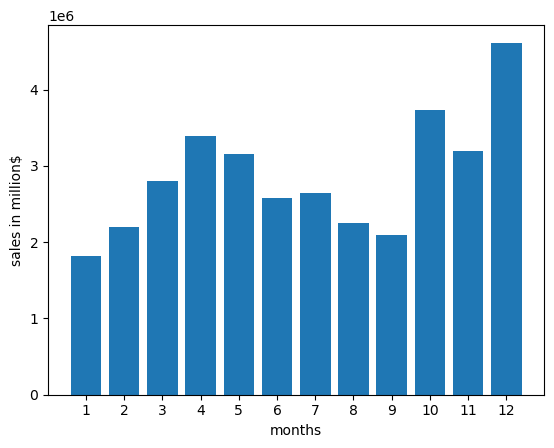

In [32]:
best_month = df.groupby('Month')['Total Price'].sum().reset_index()
plt.bar(best_month['Month'], best_month['Total Price'])
plt.xticks(best_month['Month']);
plt.ylabel('sales in million$');
plt.xlabel('months');

#### q2: what is the city with highest number of sales?

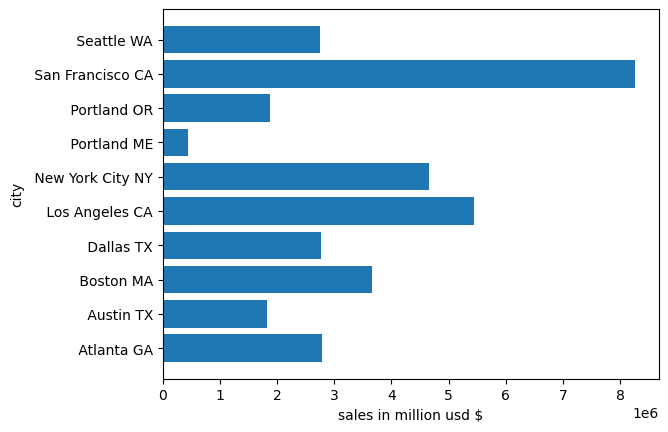

In [33]:
highest_city_sales = df.groupby('City')['Total Price'].sum().reset_index()
#highest_city_sales.iloc[highest_city_sales['Total Price'].idxmax()]
plt.barh(highest_city_sales['City'],highest_city_sales['Total Price']);
plt.xlabel('sales in million usd $');
plt.ylabel('city');
plt.show()

#### q3: what is the best time to show ads?

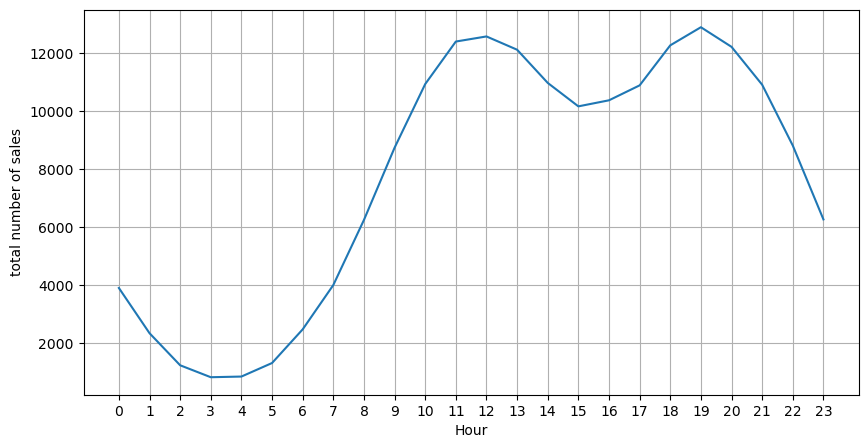

In [34]:
best_time_ad = df.groupby('Hours')['Order ID'].count().reset_index()
#best_time_ad.iloc[best_time_ad['Order ID'].idxmax()]
plt.figure(figsize=(10,5))
plt.plot(best_time_ad['Hours'],best_time_ad['Order ID']);
plt.xticks(best_time_ad['Hours'])
plt.xlabel('Hour');
plt.ylabel('total number of sales');
plt.grid()

#### q4: what products are most often sold together?

In [35]:
filt = df.loc[df['Order ID'].duplicated(keep = False)]
filt['grouped'] = filt.groupby('Order ID')['Product'].transform(lambda x: ','.join(x));
filt = filt[['Order ID','grouped']].drop_duplicates()
count = Counter()
for row in filt['grouped']:
    splited_row = row.split(',')
    count.update(Counter(combinations(splited_row, 2)))

for key, val in count.most_common(10):
    print(key , val)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


C:\Users\amroa\AppData\Local\Temp\ipykernel_32240\2159748881.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt['grouped'] = filt.groupby('Order ID')['Product'].transform(lambda x: ','.join(x));


#### q5: what product sold the most ,and why do you think it sold the most?

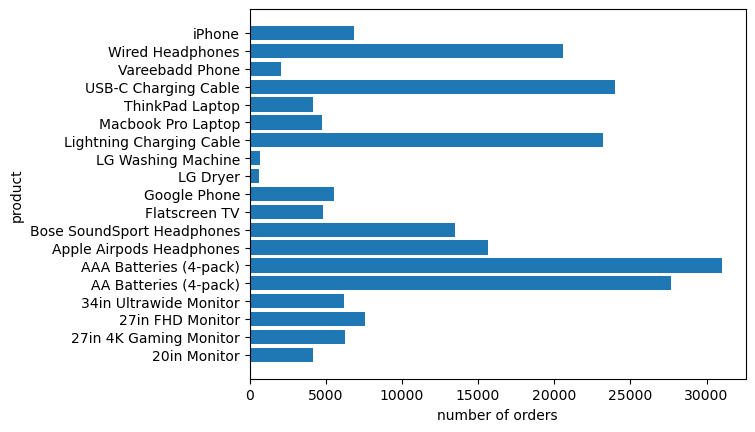

In [36]:
most_sold = df.groupby('Product')['Quantity Ordered'].sum().reset_index()
#most_sold.iloc[most_sold['Quantity Ordered'].idxmax()]
plt.barh(most_sold['Product'], most_sold['Quantity Ordered']);
plt.xlabel('number of orders');
plt.ylabel('product');

it sales the most because it is usable and sheap

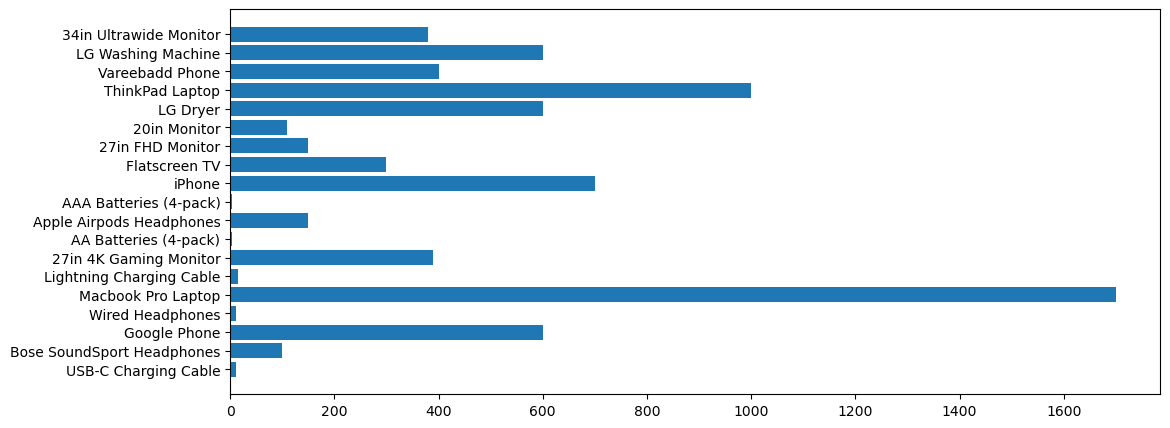

In [37]:
prices = df[['Product','Price Each']].drop_duplicates().reset_index(drop = True)
plt.figure(figsize=(12,5))
plt.barh(prices['Product'], prices['Price Each']);

C:\Users\amroa\AppData\Local\Temp\ipykernel_32240\2387666345.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  x1.set_xticklabels(most_sold['Product'] ,rotation = 'vertical');


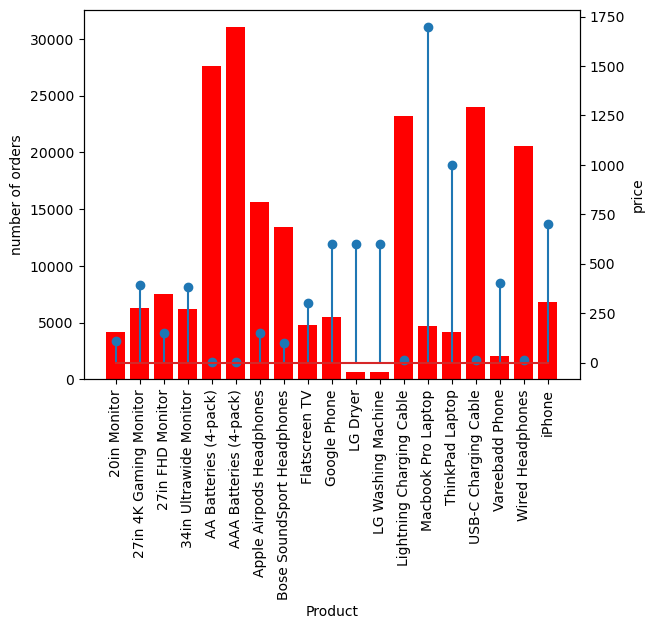

In [53]:
most_sold.sort_values(by = ['Product'], inplace = True)
prices.sort_values(by = ['Product'], inplace = True)
fig , x1 = plt.subplots()
x2 = x1.twinx()
x1.bar(most_sold['Product'], most_sold['Quantity Ordered'], color = 'r');
x2.stem(prices['Product'], prices['Price Each']);
x1.set_xlabel('Product');
x1.set_ylabel('number of orders');
x2.set_ylabel('price');
x1.set_xticklabels(most_sold['Product'] ,rotation = 'vertical');